<a href="https://colab.research.google.com/github/Amitt-44/projects/blob/main/Classification_using_NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Image Label : 5


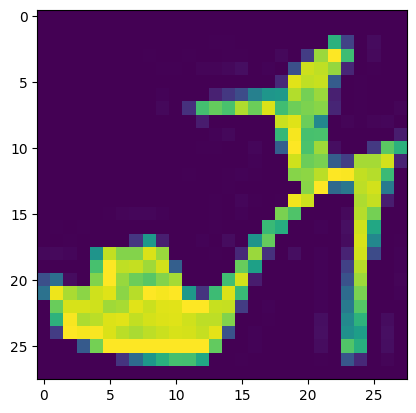

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6755 - loss: 1.0009 - val_accuracy: 0.8298 - val_loss: 0.5016
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8251 - loss: 0.5027 - val_accuracy: 0.8506 - val_loss: 0.4427
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8399 - loss: 0.4517 - val_accuracy: 0.8574 - val_loss: 0.4164
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8524 - loss: 0.4210 - val_accuracy: 0.8594 - val_loss: 0.4145
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8608 - loss: 0.3984 - val_accuracy: 0.8704 - val_loss: 0.3814
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8650 - loss: 0.3834 - val_accuracy: 0.8718 - val_loss: 0.3793
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8691 - loss: 0.3718 - val_accuracy: 0.8746 - val_loss: 0.3602
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8731 - loss: 0.3570 

In [12]:
new = xtest[:9]
predictions = model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.99999994]
 [0.         0.         0.99999994 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99999994 0.         0.         0.        ]
 [0.         0.99999994 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.99999994 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.99999994 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]

[9 2 1 1 6 1 4 6 5]


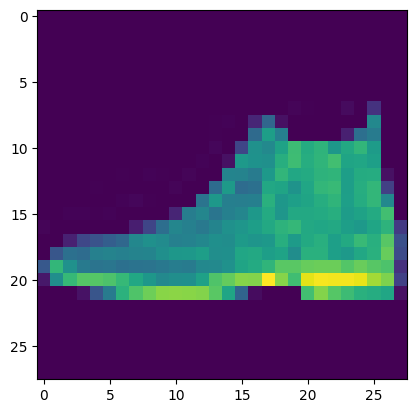

In [20]:
classes = np.argmax(predictions, axis=1)
plt.imshow(new[0])
print(classes)